![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [97]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


12


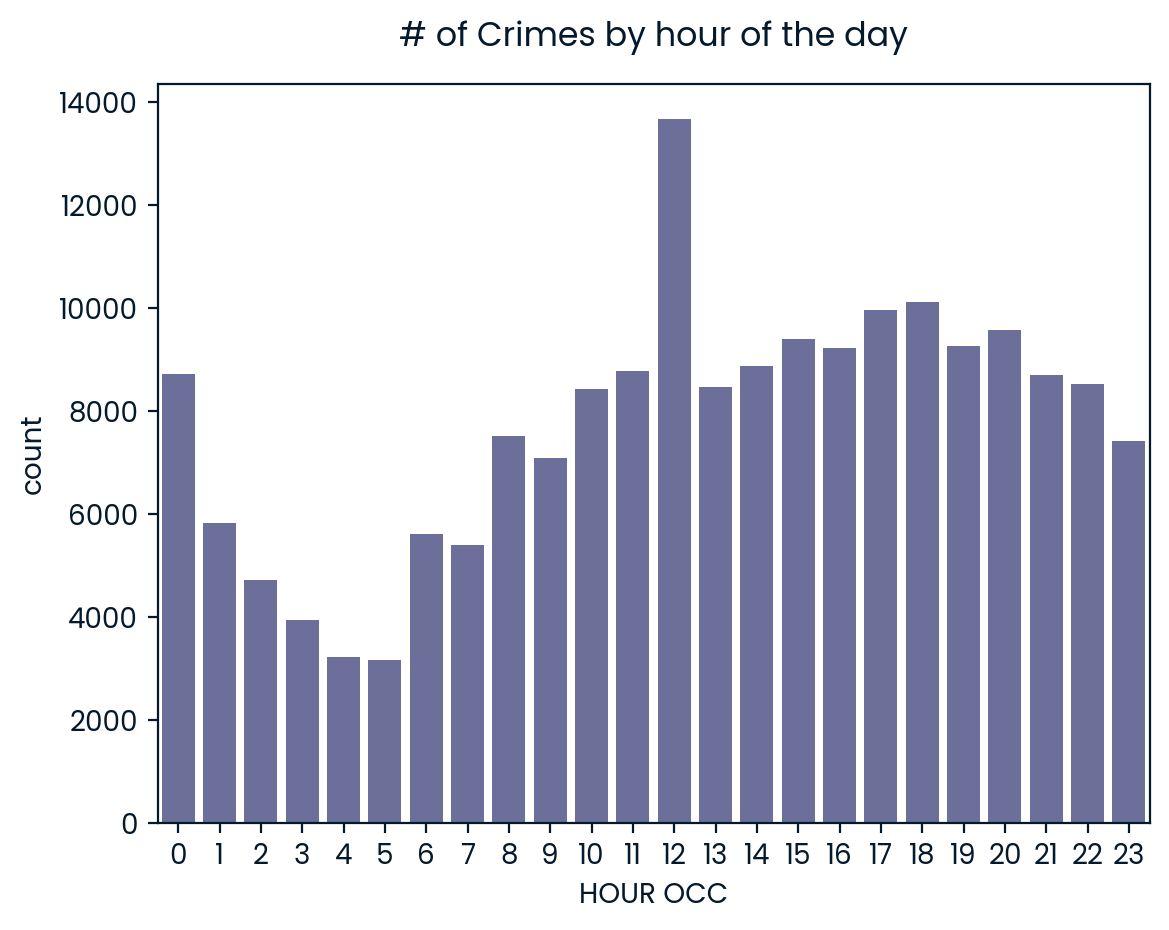

In [98]:
# Start coding here
#Create HOUR OCC, cleaning up the hour from TIME OCC, selecting only 2 first characters (hour) and converting to integer
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

peak_crime_hour = crimes["HOUR OCC"].value_counts().reset_index()

#Select only the hour with most crimes 
peak_crime_hour = peak_crime_hour["index"].iloc[0]

print(peak_crime_hour)

#Plot the crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.title("# of Crimes by hour of the day", y=1.03)
plt.show()



The area with the largest volume of night crime is Central


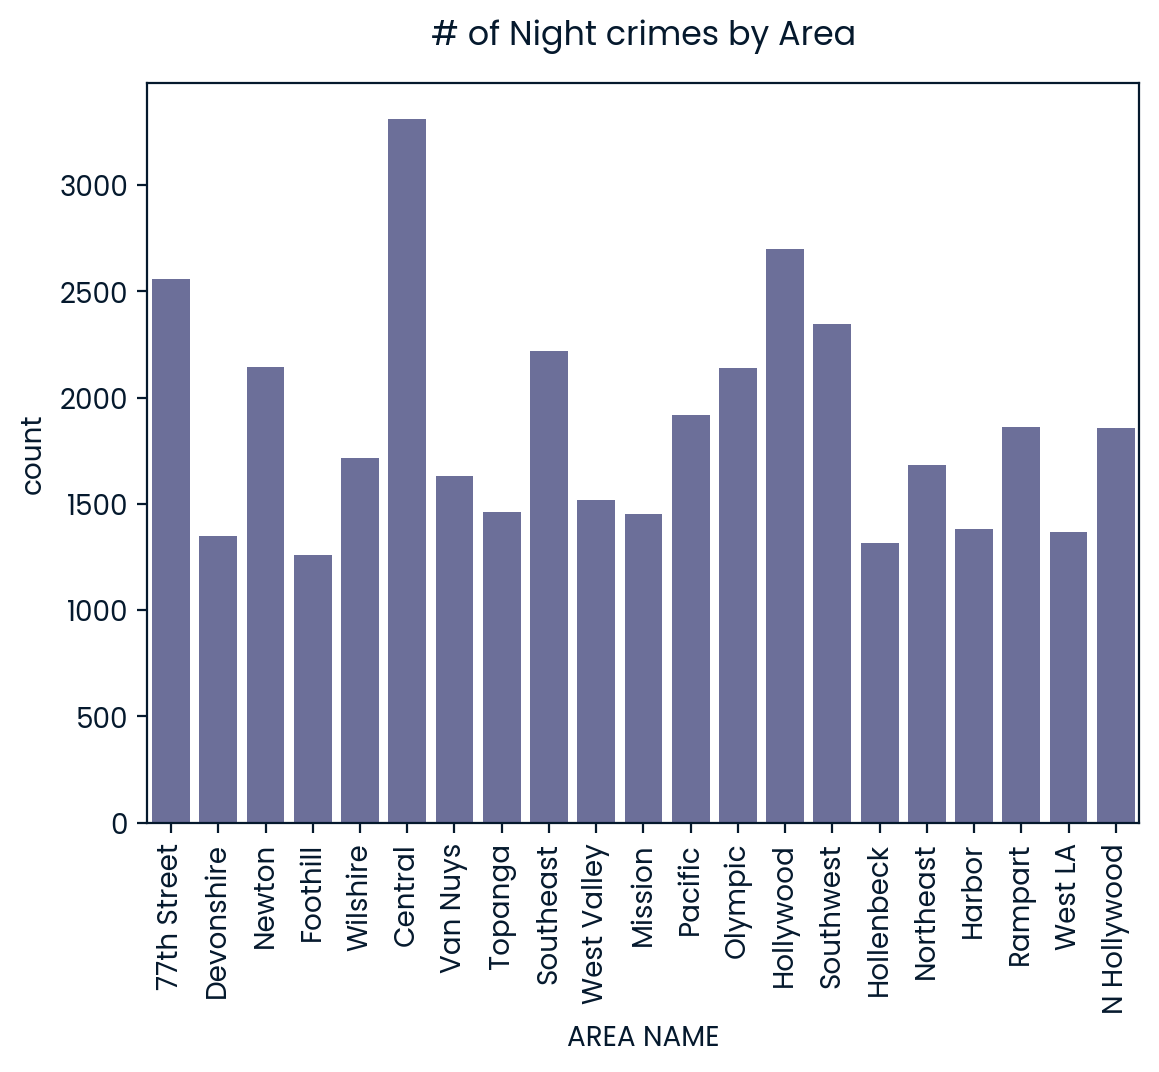

In [99]:
#Which area has the largest frequency of night crimes (10pm-4am)
# Subset the dataframe to only include data from 10pm-4am
night_time = crimes[crimes["HOUR OCC"].isin([22, 23, 0, 1, 2, 3])]

#Get the location with higest night crime by grouping by area, counting ocurrences and sorting desc
#Then from the resulted table select first row and ONLY column "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC", ascending=False).iloc[0]["AREA NAME"]

print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

#Plot number of crimes by area
sns.countplot(data=night_time, x="AREA NAME")
plt.title("# of Night crimes by Area", y=1.03)
plt.xticks(rotation=90)
plt.show()

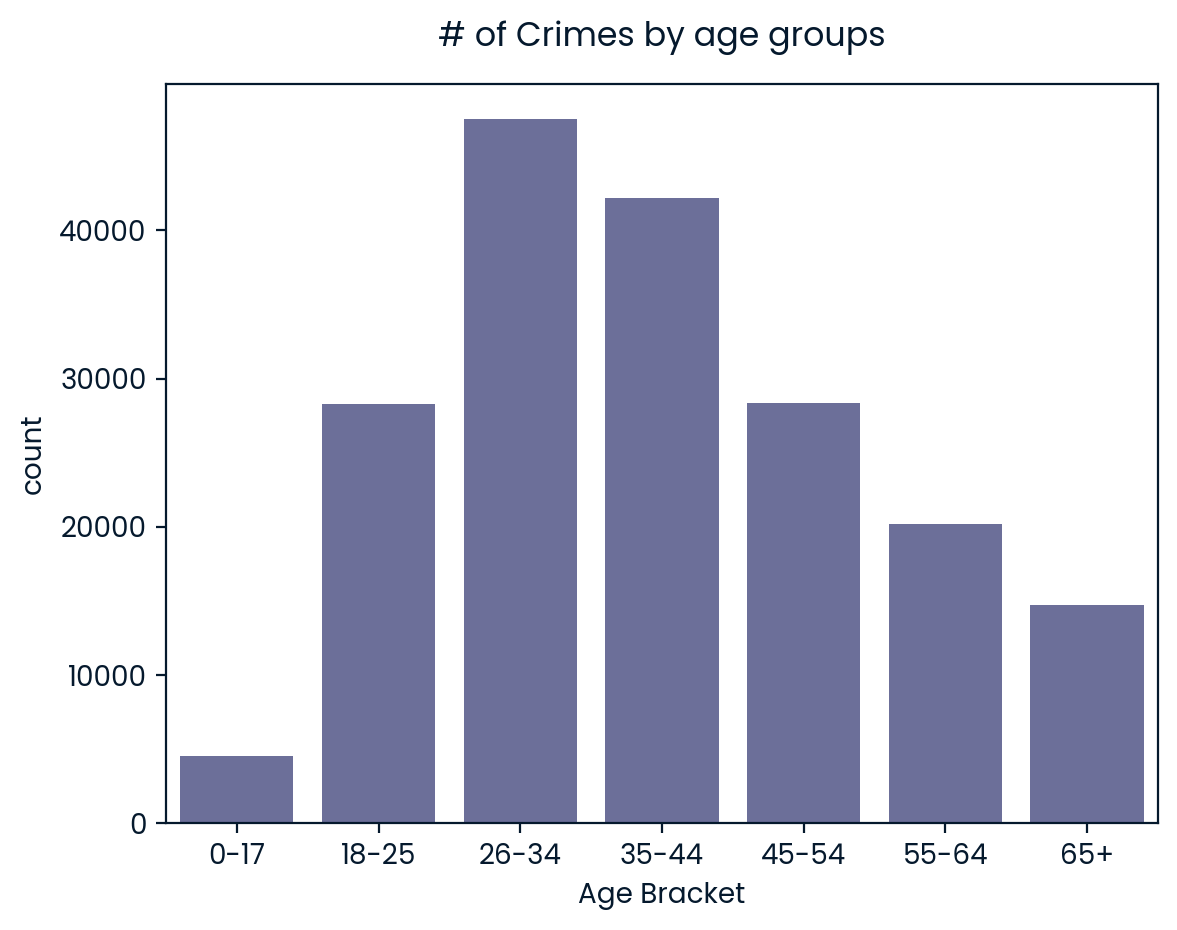

In [100]:
#Identify the number of crimes committed against victims of different age groups

#Create bins and labels for each group
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]

#Use pd.cut to create groups ['Age Bracket'] column, using the Age column, the bins and corresponding labels
crimes['Age Bracket'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

victim_ages = crimes['Age Bracket'].value_counts()

victim_ages

#Plot the number of crimes commited by Age Group
sns.countplot(data=crimes, x="Age Bracket")
plt.title("# of Crimes by age groups", y=1.03)
plt.show()